# Data Prep

In [ ]:
import os
os.chdir('../')

In [ ]:
import pandas as pd
import numpy as np

# --- 1. Load Data ---
# Load metadata (TSV file)
metadata_df = pd.read_csv('raw_data/metadata.tsv', sep='\t')
# print("Actual metadata columns:", metadata_df.columns.tolist()) # Uncomment to check your actual columns
# Load metabolomics file
metabolomics_df = pd.read_csv('raw_data/mtb.tsv', sep='\t')
print("-" * 30)

# --- 2. Merge Metadata with Metabolomics Data ---
merged_df = pd.merge(metabolomics_df, metadata_df, on='Sample', how='left')

print("--- Merged Data ---")
print("Shape after merging:", merged_df.shape)
if merged_df['Study.Group'].isnull().any() or merged_df['Antibiotics'].isnull().any():
    print("Warning: Some samples after merge have missing 'Study.Group' or 'Antibiotics' metadata.")
    print("This might happen if some samples in the metabolomics file are not present in the metadata file.")
    print("Number of samples with missing 'Study.Group':", merged_df['Study.Group'].isnull().sum())
    print("Number of samples with missing 'Antibiotics':", merged_df['Antibiotics'].isnull().sum())
print("-" * 30)


# --- 3. Filter Samples based on Criteria ---
# Criteria:
# 1. 'Study.Group' is either 'CD' or 'UC'.
# 2. 'Antibiotics' column is 'No'.
merged_df_cleaned = merged_df.dropna(subset=['Study.Group', 'Antibiotics'])

print("--- Applying Filters ---")
print("Shape before dropping NaNs in crucial metadata columns for filtering:", merged_df.shape)
print("Shape after dropping NaNs in crucial metadata columns for filtering:", merged_df_cleaned.shape)


is_ibd_patient = merged_df_cleaned['Study.Group'].isin(['CD', 'UC', 'nonIBD'])
no_antibiotics = merged_df_cleaned['Antibiotics'] == 'No'

# Apply the filters
filtered_df = merged_df_cleaned[is_ibd_patient & no_antibiotics].copy()
filtered_df.reset_index(drop=True, inplace=True)

print("\n--- Filtering Complete ---")
print("Shape of data BEFORE actual filtering (but after NaN drop for filter columns):", merged_df_cleaned.shape)
print("Shape of data AFTER filtering:", filtered_df.shape)
print("\nFinal filtered DataFrame head (example for one dataset):")
print(filtered_df.head())
print("-" * 30)

# --- 4. Save the Filtered DataFrame ---
output_filename = 'mtb.tsv'
os.makedirs('processing_data', exist_ok=True)
filtered_df.to_csv('processing_data/' + output_filename, sep='\t', index=False)

print(f"--- Saving Filtered Data ---")
print(f"Filtered data saved to: {output_filename}")
print(f"Please ensure the path is correct if you specified one.")
print("-" * 30)


------------------------------
--- Merged Data ---
Shape after merging: (382, 81891)
------------------------------
--- Applying Filters ---
Shape before dropping NaNs in crucial metadata columns for filtering: (382, 81891)
Shape after dropping NaNs in crucial metadata columns for filtering: (382, 81891)

--- Filtering Complete ---
Shape of data BEFORE actual filtering (but after NaN drop for filter columns): (382, 81891)
Shape of data AFTER filtering: (352, 81891)

Final filtered DataFrame head (example for one dataset):
     Sample  C18n_QI06__12.13-diHOME  C18n_QI07__9.10-diHOME  \
0  MSM5LLDS                   710451                  539543   
1  ESM5MEBE                  5747889                 4591365   
2  MSM6J2IQ                   681733                  473643   
3  HSM5MD62                  3185959                 5334677   
4  HSM5MD5D                   715293                 1140985   

   C18n_QI08__caproate  C18n_QI09__heptanoate  C18n_QI10__hydrocinnamate  \
0          

Statistics and Distribution

/var/folders/5z/5cnp6nfd2976vwcb3p_k2g7r0000gn/T/ipykernel_21598/3127850584.py:10: DtypeWarning: Columns (81890) have mixed types. Specify dtype option on import or set low_memory=False.
  current_filtered_df = pd.read_csv(file_path, sep='\t')


--- EDA for: processing_data/mtb.tsv ---
Shape of the loaded filtered dataset: (352, 81891)
     Sample  C18n_QI06__12.13-diHOME  C18n_QI07__9.10-diHOME  \
0  MSM5LLDS                   710451                  539543   
1  ESM5MEBE                  5747889                 4591365   
2  MSM6J2IQ                   681733                  473643   
3  HSM5MD62                  3185959                 5334677   
4  HSM5MD5D                   715293                 1140985   

   C18n_QI08__caproate  C18n_QI09__heptanoate  C18n_QI10__hydrocinnamate  \
0               6478.0                  206.0                   13993228   
1               1747.0                    NaN                     206378   
2               2479.0                    NaN                      75324   
3                 19.0                    NaN                    3970086   
4              51849.0                36276.0                      17927   

   C18n_QI11__mandelate  C18n_TF1__2-hydroxyoctanoate  \
0        

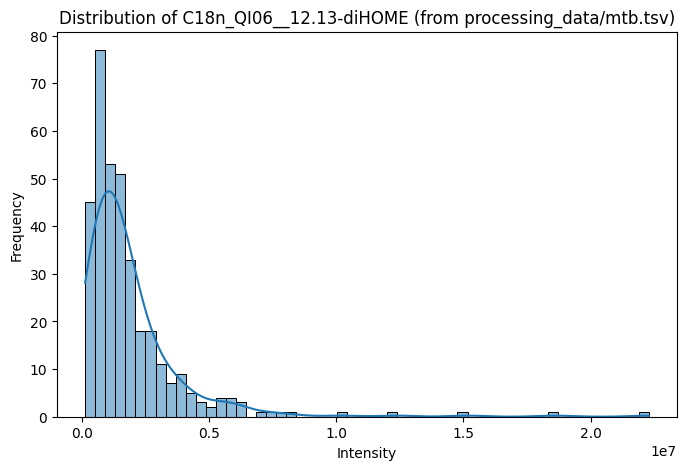

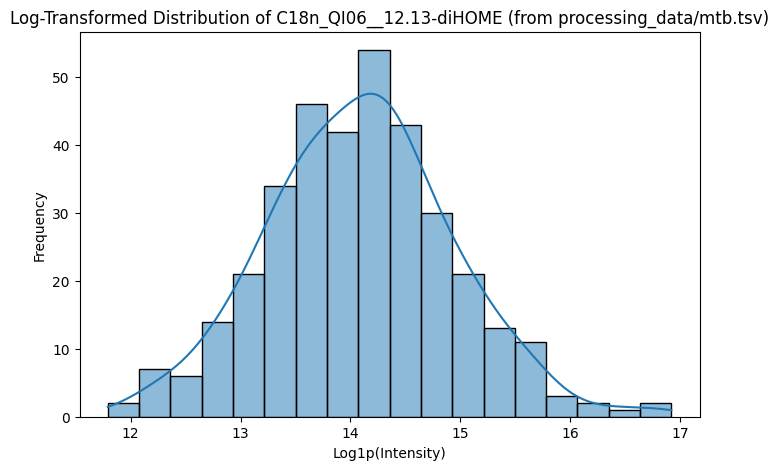

Feature 'C18n_QI06__12.13-diHOME' is skewed; consider if log transformation (shown) is appropriate for analysis.


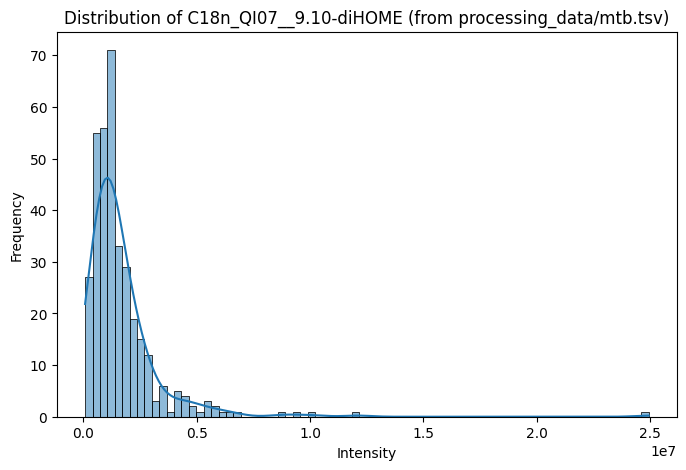

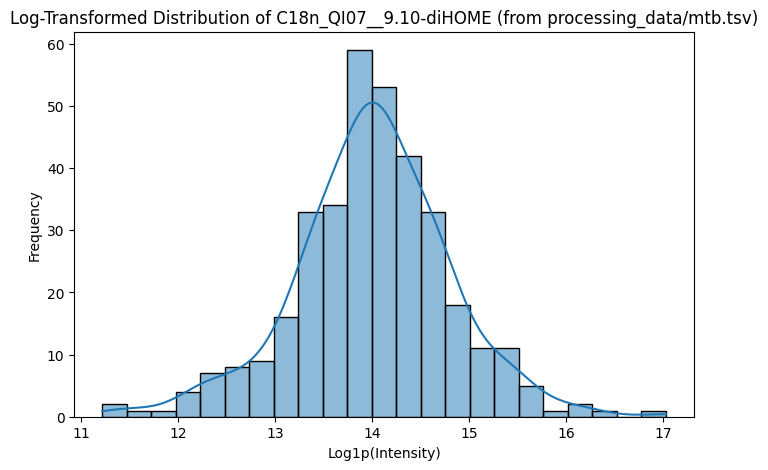

Feature 'C18n_QI07__9.10-diHOME' is skewed; consider if log transformation (shown) is appropriate for analysis.


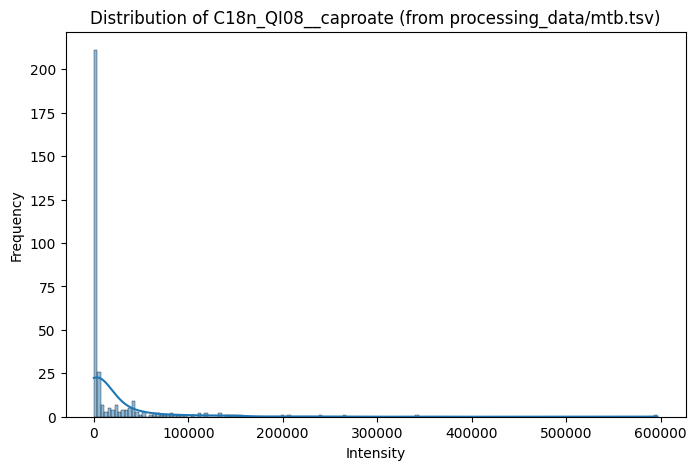

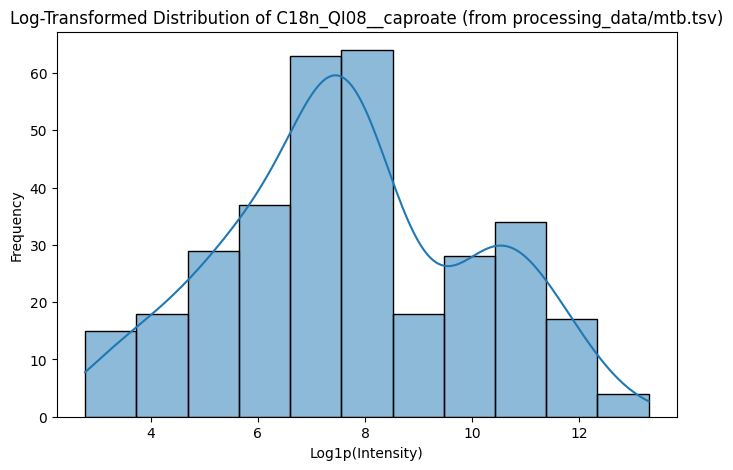

Feature 'C18n_QI08__caproate' is skewed; consider if log transformation (shown) is appropriate for analysis.


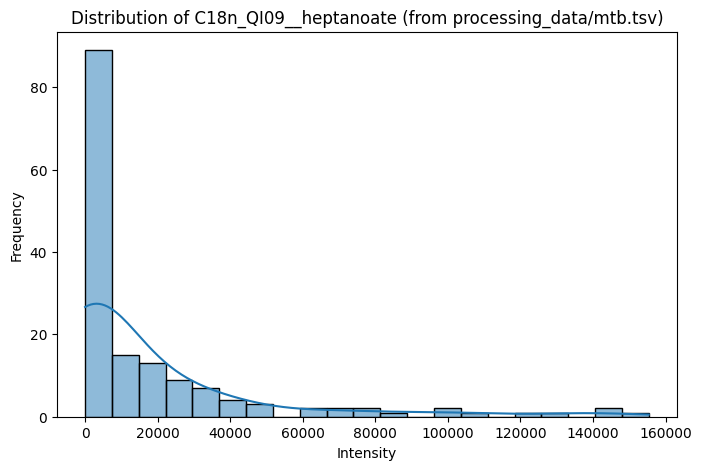

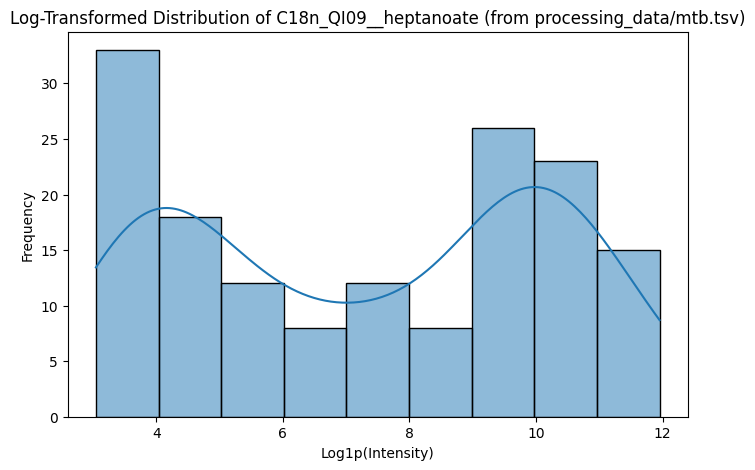

Feature 'C18n_QI09__heptanoate' is skewed; consider if log transformation (shown) is appropriate for analysis.


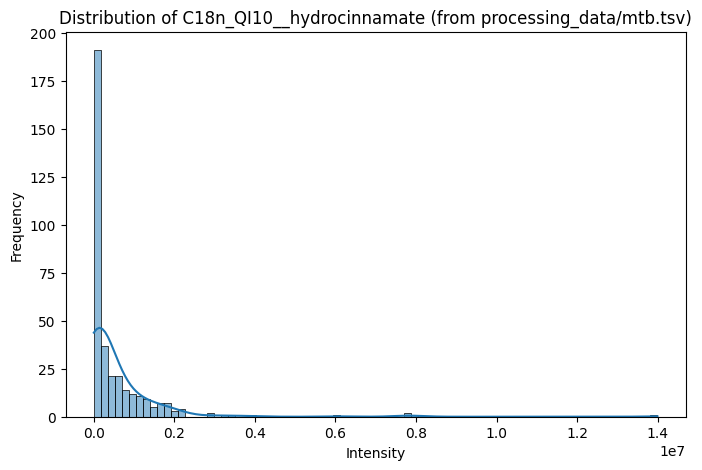

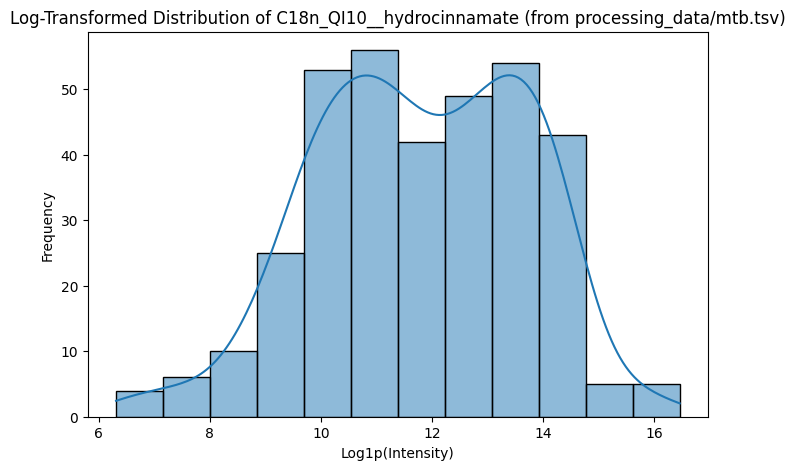

Feature 'C18n_QI10__hydrocinnamate' is skewed; consider if log transformation (shown) is appropriate for analysis.
Check histograms for skewness. Highly skewed data might benefit from log transformation.
------------------------------
--- Plotting Box Plots (CD vs UC for selected features) ---


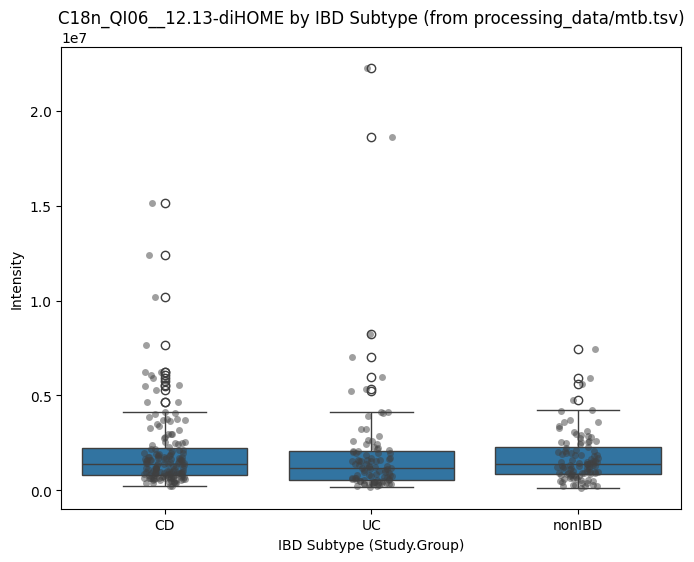

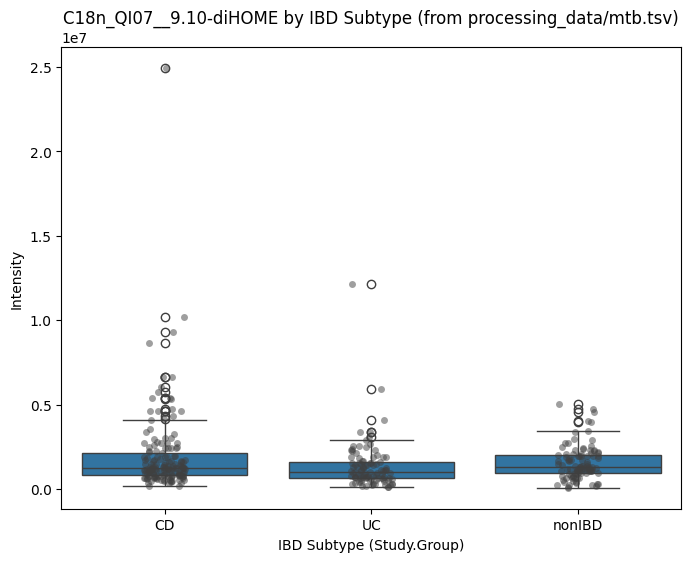

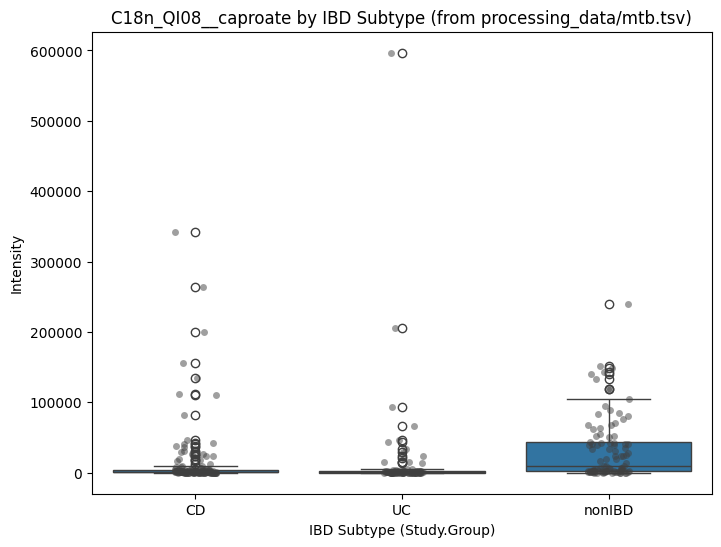

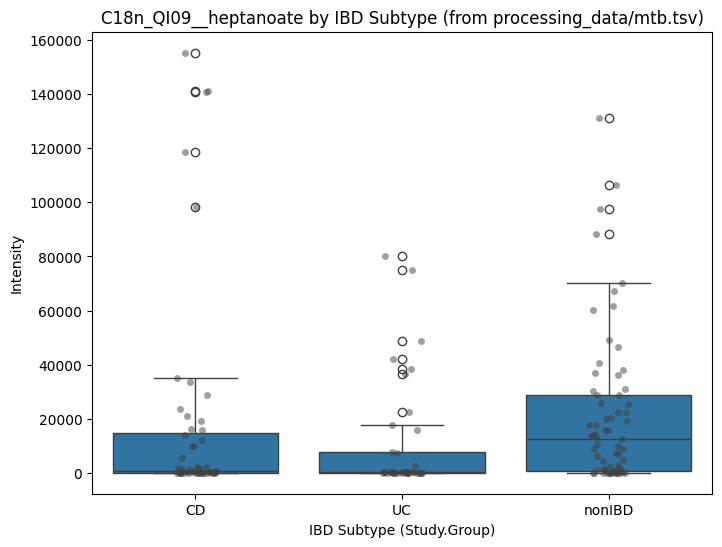

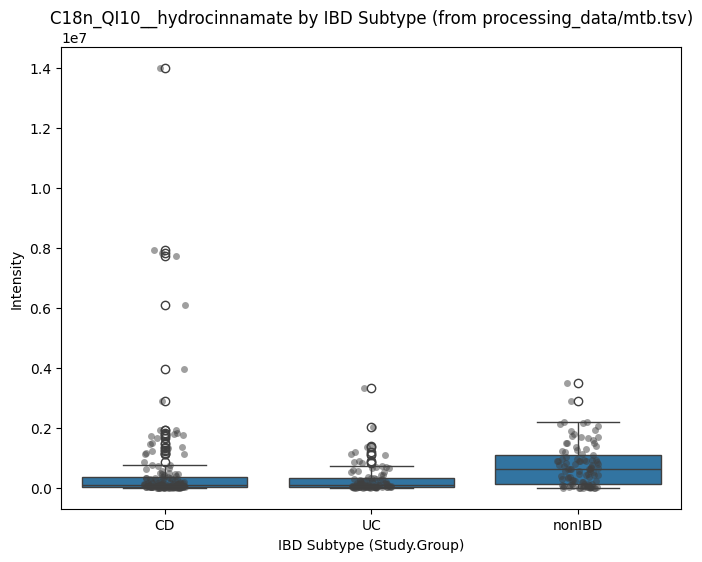

------------------------------


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# --- Load Your Saved Filtered Dataset ---
file_path = 'processing_data/mtb.tsv'

dataset_prefix = ['C18n_', 'C8p_', 'HILCn_', 'HILp_']
current_filtered_df = pd.read_csv(file_path, sep='\t')

print(f"--- EDA for: {file_path} ---")
print("Shape of the loaded filtered dataset:", current_filtered_df.shape)
print(current_filtered_df.head())
print("-" * 30)

# --- Identify Metadata and Feature Columns ---
metadata_columns_original = [
    'Dataset', 'Sample', 'Subject', 'Study.Group', 'Gender', 'DOI',
    'Publication.Name', 'consent_age', 'Age.Units', 'site_sub_coll',
    'ProjectSpecificID', 'week_num', 'date_of_receipt', 'interval_days',
    'visit_num', 'site_name', 'Age at diagnosis', 'Antibiotics', 'race',
    'fecalcal', 'BMI_at_baseline', 'Height_at_baseline', 'Weight_at_baseline',
    'smoking status'
]

# Filter this list to include only columns ACTUALLY PRESENT in the current DataFrame
# This handles cases where some metadata columns might have been dropped or not present in all files.
actual_metadata_cols_in_df = [col for col in metadata_columns_original if col in current_filtered_df.columns]

feature_columns = [col for col in current_filtered_df.columns if col not in actual_metadata_cols_in_df]

if not feature_columns:
    print("Warning: No feature columns were identified based on the metadata list. \n"
          "This could be because the metadata_columns_original list is not exhaustive for this specific merged file, \n"
          "or the remaining columns do not follow an expected metabolite naming pattern for the fallback.")
    # Fallback based on typical metabolomics prefixes, ensure dataset_prefix is set correctly
    print(f"Attempting fallback using prefix: '{dataset_prefix}'")
    feature_columns = [col for col in current_filtered_df.columns if col.startswith(dataset_prefix)]
    if not feature_columns:
         print(f"Fallback also failed. Could not identify feature columns starting with '{dataset_prefix}'.")
         print("Please ensure your feature columns have a consistent prefix or adjust the logic to identify them.")
    else:
        print(f"Using fallback: Identified {len(feature_columns)} feature columns starting with '{dataset_prefix}'.")
else:
    print(f"Identified {len(actual_metadata_cols_in_df)} metadata columns and {len(feature_columns)} feature columns.")
    print(f"Expected features based on shape: {current_filtered_df.shape[1] - len(actual_metadata_cols_in_df)}")


features_to_plot = []
if feature_columns:
    features_to_plot = feature_columns[:min(5, len(feature_columns))] # Plot for first 5 identified features
    print(f"Will plot details for up to 5 features: {features_to_plot}")
else:
    print("No features identified to plot. Skipping feature-specific statistics and plots.")

print("-" * 30)


if features_to_plot:
    # --- Basic Descriptive Statistics for Selected Features ---
    print("--- Descriptive Statistics (for selected features) ---")
    # Convert to numeric, coercing errors, then describe. This handles non-numeric data in feature columns.
    desc_stats = current_filtered_df[features_to_plot].apply(pd.to_numeric, errors='coerce').describe()
    print(desc_stats)
    print("-" * 30)

    # --- Visualize Distributions (Histograms) ---
    print("--- Plotting Histograms (for selected features) ---")
    for feature in features_to_plot:
        plt.figure(figsize=(8, 5))
        feature_data_numeric = pd.to_numeric(current_filtered_df[feature], errors='coerce').dropna()
        if not feature_data_numeric.empty:
            sns.histplot(feature_data_numeric, kde=True)
            plt.title(f'Distribution of {feature} (from {file_path})')
            plt.xlabel('Intensity')
            plt.ylabel('Frequency')
            plt.show()

            # Check if data is significantly positive and skewed before attempting log transform
            if feature_data_numeric.min() > 0 and feature_data_numeric.skew() > 1.5: # threshold for skewness
                plt.figure(figsize=(8, 5))
                sns.histplot(np.log1p(feature_data_numeric), kde=True) # log1p for log(1+x)
                plt.title(f'Log-Transformed Distribution of {feature} (from {file_path})')
                plt.xlabel('Log1p(Intensity)')
                plt.ylabel('Frequency')
                plt.show()
                print(f"Feature '{feature}' is skewed; consider if log transformation (shown) is appropriate for analysis.")
            elif feature_data_numeric.skew() > 1.5:
                 print(f"Feature '{feature}' is skewed but may contain zeros or negative values. Standard log1p might not be ideal without pre-handling.")
        else:
            print(f"No numeric data to plot for feature '{feature}' after coercing and dropping NaNs.")

    print("Check histograms for skewness. Highly skewed data might benefit from log transformation.")
    print("-" * 30)

    # --- Visualize Distributions (Box Plots comparing CD and UC) ---
    print("--- Plotting Box Plots (CD vs UC for selected features) ---")
    for feature in features_to_plot:
        plt.figure(figsize=(8, 6))
        if 'Study.Group' in current_filtered_df.columns:
            feature_data_numeric = pd.to_numeric(current_filtered_df[feature], errors='coerce')
            temp_df_for_plot = pd.DataFrame({
                feature: feature_data_numeric,
                'Study.Group': current_filtered_df['Study.Group']
            }).dropna() # Drop rows where feature data or Study.Group is NaN for this plot

            if not temp_df_for_plot.empty:
                sns.boxplot(x='Study.Group', y=feature, data=temp_df_for_plot, order=['CD', 'UC', 'nonIBD'])
                sns.stripplot(x='Study.Group', y=feature, data=temp_df_for_plot, order=['CD', 'UC', 'nonIBD'], color=".25", alpha=0.5)
                plt.title(f'{feature} by IBD Subtype (from {file_path})')
                plt.xlabel('IBD Subtype (Study.Group)')
                plt.ylabel('Intensity')
                plt.show()
            else:
                print(f"Not enough data to create box plot for {feature} after handling NaNs.")
        else:
            print(f"Column 'Study.Group' not found. Skipping box plot for {feature}.")
    print("-" * 30)
else:
    print("Skipping feature-specific EDA as no features were identified.")

# Feature Reduction

In [4]:
import pandas as pd
import numpy as np

# --- Load the Saved Filtered Dataset ---
file_path = 'processing_data/mtb.tsv'
dataset_prefix = ['C18n_', 'C8p_', 'HILCn_', 'HILp_'] 

try:
    current_filtered_df = pd.read_csv(file_path, sep='\t')
except FileNotFoundError:
    print(f"Error: The file {file_path} was not found. Using placeholder.")

print(f"--- Filtering for: {file_path} ---")
print(f"Initial shape: {current_filtered_df.shape}")

# --- Identify Metadata and Feature Columns ---
metadata_columns_original = [
    'Dataset', 'Sample', 'Subject', 'Study.Group', 'Gender', 'DOI',
    'Publication.Name', 'consent_age', 'Age.Units', 'site_sub_coll',
    'ProjectSpecificID', 'week_num', 'date_of_receipt', 'interval_days',
    'visit_num', 'site_name', 'Age at diagnosis', 'Antibiotics', 'race',
    'fecalcal', 'BMI_at_baseline', 'Height_at_baseline', 'Weight_at_baseline',
    'smoking status'
]
actual_metadata_cols_in_df = [col for col in metadata_columns_original if col in current_filtered_df.columns]
all_feature_columns = [col for col in current_filtered_df.columns if col not in actual_metadata_cols_in_df]

if not all_feature_columns:
    print(f"Warning: No feature columns identified based on metadata list.")

if not all_feature_columns:
    print("Filtering cannot proceed: No feature columns identified. Please check metadata_columns_original and feature naming.")
else:
    print(f"Identified {len(all_feature_columns)} initial feature columns.")
    
    cols_to_keep_for_filtering = []
    if 'Sample' in current_filtered_df.columns: cols_to_keep_for_filtering.append('Sample')
    if 'Study.Group' in current_filtered_df.columns: cols_to_keep_for_filtering.append('Study.Group')
    
    if not all(col in current_filtered_df.columns for col in ['Sample', 'Study.Group']):
        print("Error: 'Sample' or 'Study.Group' column not found. These are essential for filtering. Cannot proceed.")
    else:
        cols_to_keep_for_filtering.extend(all_feature_columns)
        data_to_filter = current_filtered_df[cols_to_keep_for_filtering].copy()

        # Convert feature columns to numeric
        for col in all_feature_columns:
            if col in data_to_filter.columns:
                 data_to_filter[col] = pd.to_numeric(data_to_filter[col], errors='coerce')
        
        n_initial_features = len(all_feature_columns)
        print(f"Number of features before any filtering: {n_initial_features}")
        print("-" * 30)

        # --- Remove features with very high missingness across ALL samples ---
        # Prioritizing accuracy: Remove features missing in >75% of all samples.
        threshold_overall_missing_strict = 75.0
        
        missing_percentage = data_to_filter[all_feature_columns].isnull().sum(axis=0) * 100 / len(data_to_filter)
        
        features_to_drop_step3_1 = missing_percentage[missing_percentage > threshold_overall_missing_strict].index.tolist()
        data_after_step3_1 = data_to_filter.drop(columns=features_to_drop_step3_1, errors='ignore')
        
        n_features_after_step3_1 = sum(1 for col in data_after_step3_1.columns if col not in ['Sample', 'Study.Group'])
        print(f"--- Overall Missingness Filter (> {threshold_overall_missing_strict}%) ---")
        print(f"Number of features dropped: {len(features_to_drop_step3_1)}")
        print(f"Number of features remaining: {n_features_after_step3_1}")
        print(f"Shape after: {data_after_step3_1.shape}")
        print("-" * 30)

        feature_columns_after_step3_1 = [col for col in data_after_step3_1.columns if col not in ['Sample', 'Study.Group']]

        # --- Filter based on presence in at least one biological group (CD or UC) ---
        # Prioritizing accuracy: Keep features present in at least 30% of samples in EITHER CD OR UC.
        threshold_group_presence_percent_strict = 30.0
        
        features_to_keep_step3_2 = []
        if not feature_columns_after_step3_1:
            print("No features remaining after 'removing' step to apply group-based filtering.")
        else:
            cd_samples_df = data_after_step3_1[data_after_step3_1['Study.Group'] == 'CD']
            uc_samples_df = data_after_step3_1[data_after_step3_1['Study.Group'] == 'UC']
            nonIBD_samples_df = data_after_step3_1[data_after_step3_1['Study.Group'] == 'nonIBD']

            if cd_samples_df.empty and uc_samples_df.empty and nonIBD_samples_df.empty:
                print("Warning: No samples found for CD, UC, or nonIBD groups. Cannot perform group-based filtering.")
            else:
                for feature in feature_columns_after_step3_1:
                    is_present_enough = False
                    # Check CD
                    if not cd_samples_df.empty:
                        percent_present_cd = (100 - (cd_samples_df[feature].isnull().sum() * 100 / len(cd_samples_df)))
                        if percent_present_cd >= threshold_group_presence_percent_strict:
                            is_present_enough = True
                    
                    # Check UC only if not already qualified by CD
                    if not is_present_enough and not uc_samples_df.empty:
                        percent_present_uc = (100 - (uc_samples_df[feature].isnull().sum() * 100 / len(uc_samples_df)))
                        if percent_present_uc >= threshold_group_presence_percent_strict:
                            is_present_enough = True
                    
                    # Check nonIBD only if not already qualified by CD or UC
                    if not is_present_enough and not nonIBD_samples_df.empty:
                        percent_present_nonIBD = (100 - (nonIBD_samples_df[feature].isnull().sum() * 100 / len(nonIBD_samples_df)))
                        if percent_present_nonIBD >= threshold_group_presence_percent_strict:
                            is_present_enough = True
                    
                    if is_present_enough:
                        features_to_keep_step3_2.append(feature)
            
            features_to_drop_step3_2 = [f for f in feature_columns_after_step3_1 if f not in features_to_keep_step3_2]
            data_after_step3_2 = data_after_step3_1[['Sample', 'Study.Group'] + features_to_keep_step3_2]

            n_features_after_step3_2 = len(features_to_keep_step3_2)
            print(f"--- Group-based Presence Filter (Present in >= {threshold_group_presence_percent_strict}% in CD, UC, or nonIBD) ---")
            print(f"Number of features BEFORE this filter (after Step 3.1): {len(feature_columns_after_step3_1)}")
            print(f"Number of features dropped: {len(features_to_drop_step3_2)}")
            print(f"Number of features remaining: {n_features_after_step3_2}")
            print(f"Shape after: {data_after_step3_2.shape}")
            print("-" * 30)
            
            final_filtered_features_df = data_after_step3_2
            print("\n--- Resulting DataFrame after preprocessing ---")
            print(final_filtered_features_df.head())
            
            output_filename_step3_2 = f"processing_data/filtered_mtb.tsv"
            final_filtered_features_df.to_csv(output_filename_step3_2, sep='\t', index=False)
            print(f"Saved intermediate filtered data to: {output_filename_step3_2}")

/var/folders/5z/5cnp6nfd2976vwcb3p_k2g7r0000gn/T/ipykernel_21598/2193073173.py:9: DtypeWarning: Columns (81890) have mixed types. Specify dtype option on import or set low_memory=False.
  current_filtered_df = pd.read_csv(file_path, sep='\t')


--- Filtering for: processing_data/mtb.tsv ---
Initial shape: (352, 81891)
Identified 81867 initial feature columns.
Number of features before any filtering: 81867
------------------------------
--- Step 3.1: Overall Missingness Filter (> 75.0%) ---
Number of features dropped: 18326
Number of features remaining: 63541
Shape after Step 3.1: (352, 63543)
------------------------------
--- Step 3.2: Group-based Presence Filter (Present in >= 30.0% in CD, UC, or nonIBD) ---
Number of features BEFORE this filter (after Step 3.1): 63541
Number of features dropped: 561
Number of features remaining: 62980
Shape after Step 3.2: (352, 62982)
------------------------------

--- Resulting DataFrame after Step 3.1 and 3.2 ---
     Sample Study.Group  C18n_QI06__12.13-diHOME  C18n_QI07__9.10-diHOME  \
0  MSM5LLDS          CD                   710451                  539543   
1  ESM5MEBE          CD                  5747889                 4591365   
2  MSM6J2IQ          CD                   681733 

Variance filtering

In [5]:
import pandas as pd
import numpy as np

# --- Load Dataset from previous step ---
file_path_step3_2 = 'processing_data/filtered_mtb.tsv'
dataset_prefix = ['C18n_', 'C8p_', 'HILCn_', 'HILp_'] 

try:
    data_after_step3_2 = pd.read_csv(file_path_step3_2, sep='\t')
except FileNotFoundError:
    print(f"Error: The file {file_path_step3_2} was not found.")


print(f"--- Low Variance Filtering for: {file_path_step3_2} ---")
print(f"Shape before low variance filter: {data_after_step3_2.shape}")

# --- Identify Feature Columns ---
feature_columns_for_variance = [col for col in data_after_step3_2.columns if col not in ['Sample', 'Study.Group']]

if not feature_columns_for_variance:
    print("No feature columns found to apply variance filter.")
else:
    print(f"Number of features to assess for variance: {len(feature_columns_for_variance)}")
    current_features_df = data_after_step3_2[['Sample', 'Study.Group'] + feature_columns_for_variance].copy()

    # Ensure feature columns are numeric for IQR calculation
    numeric_features_df = current_features_df[feature_columns_for_variance].apply(pd.to_numeric, errors='coerce')

    # --- Calculate IQR for each feature ---
    Q1_initial = numeric_features_df.quantile(0.25)
    Q3_initial = numeric_features_df.quantile(0.75)
    IQR_initial = Q3_initial - Q1_initial

    print("\n--- IQR Calculation Summary (Initial) ---")
    print("Summary statistics for initially calculated IQRs:")
    print(IQR_initial.describe())
    
    # --- Filter 1: Features with IQR == 0 (or very close to it) ---
    epsilon = 1e-9 
    features_to_drop_iqr_zero = IQR_initial[IQR_initial <= epsilon].index.tolist()
    
    print(f"\n--- Filter 1: Removing Zero/Near-Zero IQR Features ---")
    print(f"Number of features with IQR <= {epsilon}: {len(features_to_drop_iqr_zero)}")
    
    data_after_iqr_zero_filter = current_features_df.drop(columns=features_to_drop_iqr_zero, errors='ignore')
    feature_columns_after_iqr_zero = [col for col in data_after_iqr_zero_filter.columns if col not in ['Sample', 'Study.Group']]
    n_features_after_iqr_zero = len(feature_columns_after_iqr_zero)

    print(f"Number of features remaining after removing zero/near-zero IQR features: {n_features_after_iqr_zero}")
    print(f"Shape after zero IQR filter: {data_after_iqr_zero_filter.shape}")
    print("-" * 30)

    # --- Filter 2: Features with very low IQR (bottom 5th percentile of remaining non-zero IQRs) ---
    if not feature_columns_after_iqr_zero: # Check if any features left
        print("No features remaining to apply percentile-based IQR filter.")
        final_filtered_df_step3_4 = data_after_iqr_zero_filter.copy()
    else:
        # Recalculate IQRs for the remaining features
        numeric_features_after_iqr_zero = data_after_iqr_zero_filter[feature_columns_after_iqr_zero].apply(pd.to_numeric, errors='coerce')
        Q1_remaining = numeric_features_after_iqr_zero.quantile(0.25)
        Q3_remaining = numeric_features_after_iqr_zero.quantile(0.75)
        IQR_remaining = Q3_remaining - Q1_remaining
        
        # Consider only non-zero IQRs for percentile calculation to avoid skewing by already-zero ones (though they should be gone)
        non_zero_iqr_remaining = IQR_remaining[IQR_remaining > epsilon] 
        
        if not non_zero_iqr_remaining.empty:
            # Define the percentile for cutoff
            percentile_cutoff = 5.0
            iqr_percentile_threshold_value = np.percentile(non_zero_iqr_remaining, percentile_cutoff)
            
            print(f"\n--- Filter 2: Removing Features Below {percentile_cutoff}th Percentile of Remaining Non-Zero IQRs ---")
            print(f"{percentile_cutoff}th percentile of remaining non-zero IQRs: {iqr_percentile_threshold_value:.4g}")
            
            # Identify features to drop based on this percentile threshold
            # These are features whose IQR is > epsilon (not zero) BUT < iqr_percentile_threshold_value
            features_to_drop_iqr_percentile = non_zero_iqr_remaining[non_zero_iqr_remaining < iqr_percentile_threshold_value].index.tolist()
            
            print(f"Number of features with IQR below the {percentile_cutoff}th percentile (and > epsilon): {len(features_to_drop_iqr_percentile)}")
            
            final_filtered_df_step3_4 = data_after_iqr_zero_filter.drop(columns=features_to_drop_iqr_percentile, errors='ignore')
            n_features_after_iqr_percentile = sum(1 for col in final_filtered_df_step3_4.columns if col not in ['Sample', 'Study.Group'])

            print(f"Number of features remaining after {percentile_cutoff}th percentile IQR filter: {n_features_after_iqr_percentile}")
            print(f"Shape after {percentile_cutoff}th percentile IQR filter: {final_filtered_df_step3_4.shape}")
        else:
            print("No features with non-zero IQR remaining to apply percentile-based filter. Using data after zero IQR filter.")
            final_filtered_df_step3_4 = data_after_iqr_zero_filter.copy()
    print("-" * 30)
    
    print("\n--- Resulting DataFrame after 'Zero/Near-Zero IQR Filter AND 5th Percentile IQR Filter' ---")
    print(final_filtered_df_step3_4.head())
    print(f"Final shape after this step: {final_filtered_df_step3_4.shape}")

    output_filename_step3_4 = f"processing_data/reduced_mtb.tsv"
    final_filtered_df_step3_4.to_csv(output_filename_step3_4, sep='\t', index=False)
    print(f"Saved data after low variance filter to: {output_filename_step3_4}")

--- Low Variance Filtering for: processing_data/filtered_mtb.tsv ---
Shape before low variance filter: (352, 62982)
Number of features to assess for variance: 62980

--- IQR Calculation Summary (Initial) ---
Summary statistics for initially calculated IQRs:
count    6.298000e+04
mean     5.623237e+05
std      2.114527e+07
min      4.000000e+00
25%      7.846875e+03
50%      2.385325e+04
75%      8.164719e+04
max      3.110979e+09
dtype: float64

--- Filter 1: Removing Zero/Near-Zero IQR Features ---
Number of features with IQR <= 1e-09: 0
Number of features remaining after removing zero/near-zero IQR features: 62980
Shape after zero IQR filter: (352, 62982)
------------------------------

--- Filter 2: Removing Features Below 5.0th Percentile of Remaining Non-Zero IQRs ---
5.0th percentile of remaining non-zero IQRs: 1404
Number of features with IQR below the 5.0th percentile (and > epsilon): 3149
Number of features remaining after 5.0th percentile IQR filter: 59831
Shape after 5.0th p

Imputing missing values

In [6]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')


# --- Load Dataset from previous step ---
file_path_step3_4 = 'processing_data/reduced_mtb.tsv'
dataset_prefix = ['C18n_', 'C8p_', 'HILCn_', 'HILp_'] 

try:
    data_after_step3_4 = pd.read_csv(file_path_step3_4, sep='\t')
except FileNotFoundError:
    print(f"Error: The file {file_path_step3_4} was not found.")

print(f"--- Missing Value Imputation for: {file_path_step3_4} ---")
print(f"Shape before imputation: {data_after_step3_4.shape}")

# --- Identify Feature Columns ---
feature_columns_for_imputation = [col for col in data_after_step3_4.columns if col not in ['Sample', 'Study.Group']]

if not feature_columns_for_imputation:
    print("No feature columns found to apply imputation.")
else:
    print(f"Identified {len(feature_columns_for_imputation)} feature columns for imputation.")
    
    # Create a copy for imputation to keep the original safe if needed for comparison
    data_to_impute = data_after_step3_4.copy()

    # Ensure feature columns are numeric before imputation
    for col in feature_columns_for_imputation:
        data_to_impute[col] = pd.to_numeric(data_to_impute[col], errors='coerce')

    total_nans_before_imputation = data_to_impute[feature_columns_for_imputation].isnull().sum().sum()
    print(f"Total missing values (NaNs) in feature columns BEFORE imputation: {total_nans_before_imputation}")

    # --- Imputation Logic ---
    fallback_impute_value = 1.0 # A very small constant if a feature has no positive values
     
    overall_min_positive_in_dataset = np.nanmin(data_to_impute[feature_columns_for_imputation].map(lambda x: x if x > 0 else np.nan).values)
    if pd.isna(overall_min_positive_in_dataset) or overall_min_positive_in_dataset == 0:
        print("Warning: Could not determine a valid overall minimum positive value in the dataset. Using default fallback.")
    else:
        fallback_impute_value = overall_min_positive_in_dataset / 100 # e.g. two orders of magnitude smaller
        if fallback_impute_value == 0 : fallback_impute_value = 1e-9
    print(f"Using fallback imputation value (if needed for specific columns): {fallback_impute_value:.4g}")


    for feature in feature_columns_for_imputation:
        min_positive_val = data_to_impute[feature][data_to_impute[feature] > 0].min()
        
        if pd.notna(min_positive_val) and min_positive_val > 0:
            impute_val = min_positive_val / 2.0
        else:
            # This case should be rare for features that passed all filters,
            # but handles columns with all NaNs, zeros, or negative values.
            impute_val = fallback_impute_value
            print(f"Warning: Feature '{feature}' had no positive values. Using fallback imputation value: {impute_val:.4g}")
            
        data_to_impute[feature].fillna(impute_val, inplace=True)

    total_nans_after_imputation = data_to_impute[feature_columns_for_imputation].isnull().sum().sum()
    print(f"Total missing values (NaNs) in feature columns AFTER imputation: {total_nans_after_imputation}")

    if total_nans_after_imputation == 0:
        print("Imputation successful. No NaNs remaining in feature columns.")
    else:
        print("Warning: NaNs still present after imputation. Please check the data and imputation logic.")
        print(data_to_impute[feature_columns_for_imputation].isnull().sum()[data_to_impute[feature_columns_for_imputation].isnull().sum() > 0])
    print("-" * 30)
    
    final_imputed_df = data_to_impute
    print("\n--- Resulting DataFrame after Imputation ---")
    print(final_imputed_df.head())
    print(f"Final shape after imputation: {final_imputed_df.shape}")

    # --- Save the Imputed DataFrame ---
    output_filename_step4 = f"processing_data/imputed_mtb.tsv" 
    final_imputed_df.to_csv(output_filename_step4, sep='\t', index=False)
    print(f"\nSaved imputed data to: {output_filename_step4}")
    print("-" * 30)

--- Missing Value Imputation for: processing_data/reduced_mtb.tsv ---
Shape before imputation: (352, 59833)
Identified 59831 feature columns for imputation.
Total missing values (NaNs) in feature columns BEFORE imputation: 4937874
Using fallback imputation value (if needed for specific columns): 0.05
Total missing values (NaNs) in feature columns AFTER imputation: 0
Imputation successful. No NaNs remaining in feature columns.
------------------------------

--- Resulting DataFrame after Imputation ---
     Sample Study.Group  C18n_QI06__12.13-diHOME  C18n_QI07__9.10-diHOME  \
0  MSM5LLDS          CD                   710451                  539543   
1  ESM5MEBE          CD                  5747889                 4591365   
2  MSM6J2IQ          CD                   681733                  473643   
3  HSM5MD62          CD                  3185959                 5334677   
4  HSM5MD5D      nonIBD                   715293                 1140985   

   C18n_QI08__caproate  C18n_QI09__h

Post imputation EDA, Log transformation

--- Post-Imputation EDA & Log Transformation for: processing_data/imputed_mtb.tsv ---
Shape of loaded imputed dataset: (352, 59833)
     Sample Study.Group  C18n_QI06__12.13-diHOME  C18n_QI07__9.10-diHOME  \
0  MSM5LLDS          CD                   710451                  539543   
1  ESM5MEBE          CD                  5747889                 4591365   
2  MSM6J2IQ          CD                   681733                  473643   
3  HSM5MD62          CD                  3185959                 5334677   
4  HSM5MD5D      nonIBD                   715293                 1140985   

   C18n_QI08__caproate  C18n_QI09__heptanoate  C18n_QI10__hydrocinnamate  \
0               6478.0                  206.0                   13993228   
1               1747.0                   10.0                     206378   
2               2479.0                   10.0                      75324   
3                 19.0                   10.0                    3970086   
4              51849.0         

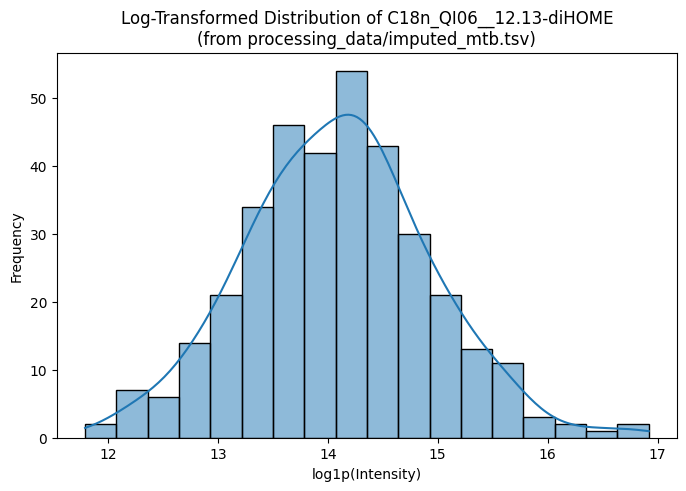

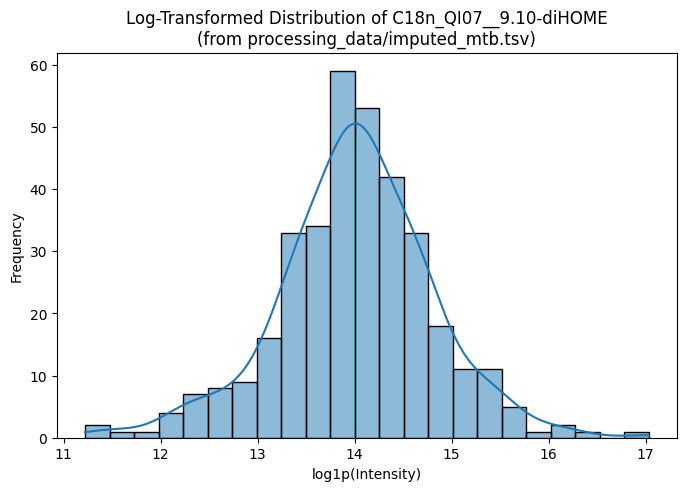

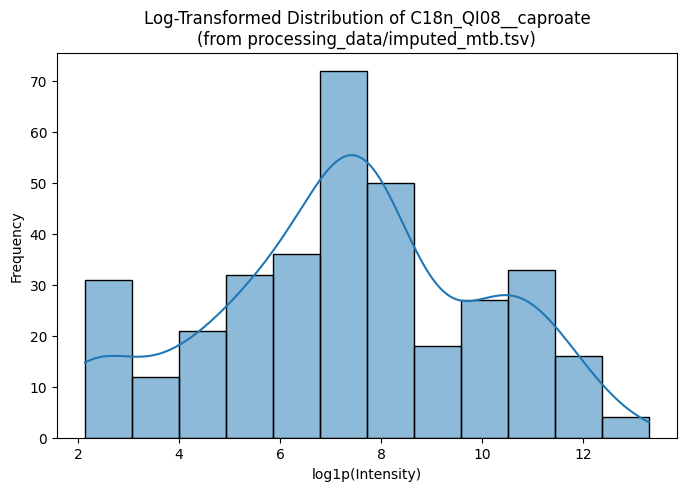

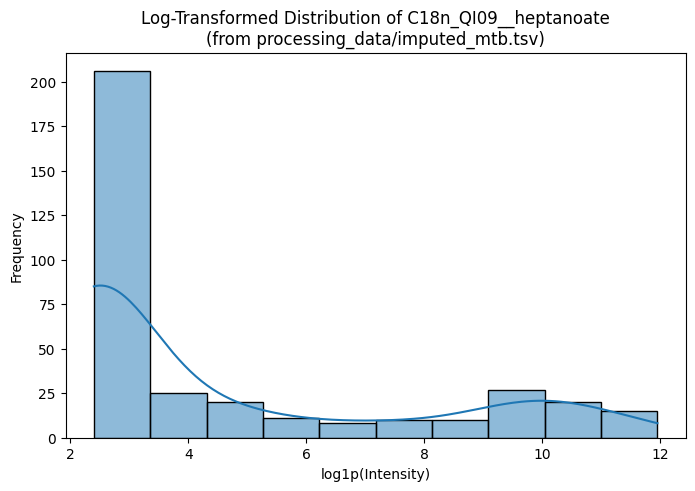

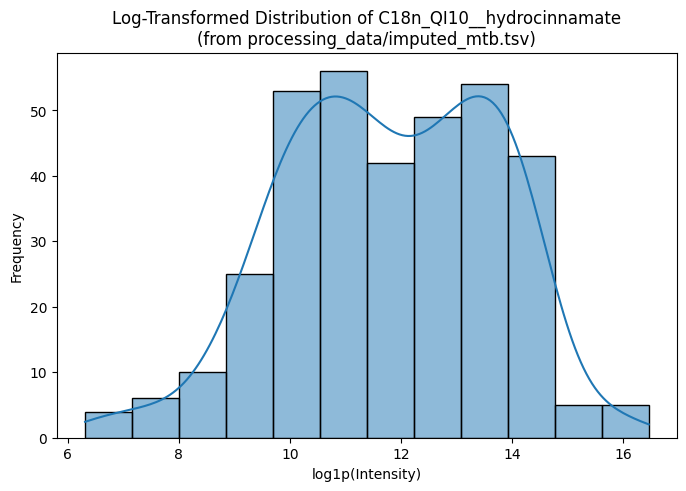

------------------------------

--- Skewness After Log Transformation (for selected features) ---
C18n_QI06__12.13-diHOME      0.163880
C18n_QI07__9.10-diHOME      -0.141110
C18n_QI08__caproate         -0.162246
C18n_QI09__heptanoate        1.105285
C18n_QI10__hydrocinnamate   -0.237142
dtype: float64
Ideally, skewness values should be closer to 0 after log transformation.
------------------------------

--- PCA on Log-Transformed Data ---
Log-transformed data standardized.

Explained variance ratio by component (Log-Transformed Data):
PC1: 0.0878 (Cumulative: 0.0878)
PC2: 0.0621 (Cumulative: 0.1500)
PC3: 0.0455 (Cumulative: 0.1955)
PC4: 0.0405 (Cumulative: 0.2360)
PC5: 0.0299 (Cumulative: 0.2659)
PC6: 0.0271 (Cumulative: 0.2931)
PC7: 0.0212 (Cumulative: 0.3143)
PC8: 0.0186 (Cumulative: 0.3328)
PC9: 0.0159 (Cumulative: 0.3487)
PC10: 0.0152 (Cumulative: 0.3639)


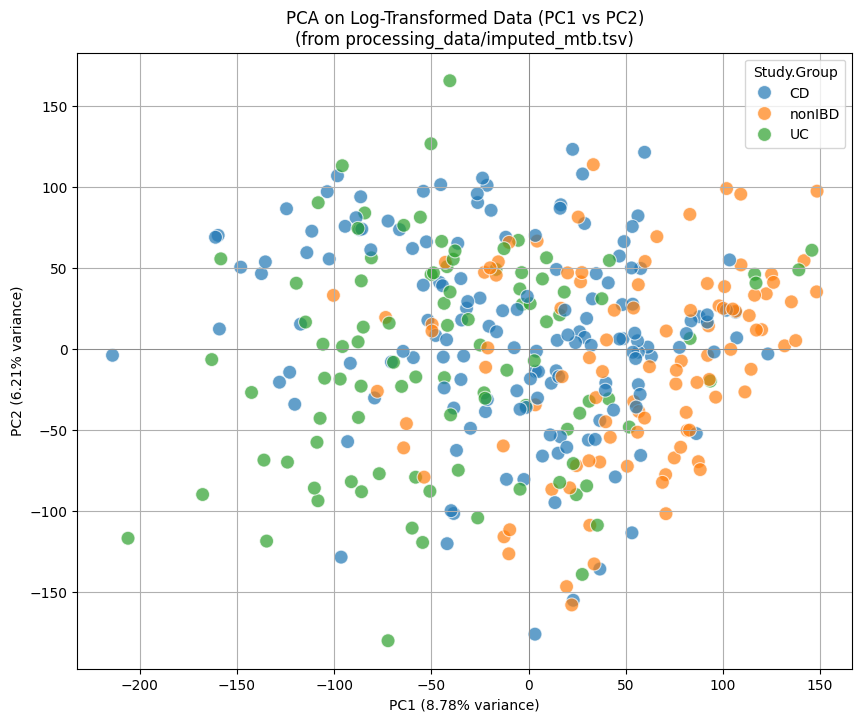

------------------------------

Saved log-transformed data to: processing_data/log_transformed_mtb.tsv
------------------------------


In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# --- Load the Imputed Dataset ---
file_path_step4 = 'processing_data/imputed_mtb.tsv'
dataset_name_for_file = 'mtb'

try:
    imputed_df = pd.read_csv(file_path_step4, sep='\t')
except FileNotFoundError:
    print(f"Error: The file {file_path_step4} was not found.")


print(f"--- Post-Imputation EDA & Log Transformation for: {file_path_step4} ---")
print(f"Shape of loaded imputed dataset: {imputed_df.shape}")
print(imputed_df.head())

# --- Identify Metadata and Feature Columns ---
# Assuming 'Sample' and 'Study.Group' are the only non-feature columns at this stage
feature_columns = [col for col in imputed_df.columns if col not in ['Sample', 'Study.Group']]

if not feature_columns:
    print("No feature columns found. Exiting Step 6 for this dataset.")
else:
    print(f"Identified {len(feature_columns)} feature columns.")
    data_for_log_transform = imputed_df[feature_columns].copy()

    # --- 1. Apply Log Transformation (log1p) ---
    if (data_for_log_transform < 0).any().any():
        print("Warning: Negative values found in feature data before log transformation. This should not happen after our imputation.")
        print("Clamping negative values to 0 before log1p for robustness.")
        data_for_log_transform[data_for_log_transform < 0] = 0
        
    log_transformed_features = data_for_log_transform.apply(np.log1p)
    print("\n--- Log Transformation Complete (log1p) ---")

    # Create the new dataframe with log-transformed features and metadata
    log_transformed_df = pd.concat([imputed_df[['Sample', 'Study.Group']], log_transformed_features], axis=1)
    print("Shape of log-transformed DataFrame:", log_transformed_df.shape)


    # --- 2. Visualize Distributions Post-Log Transformation (Selected Features) ---
    features_to_plot = feature_columns[:min(5, len(feature_columns))] # Plot first 5
    print(f"\n--- Plotting Histograms for Log-Transformed Features: {features_to_plot} ---")
    for feature in features_to_plot:
        plt.figure(figsize=(8, 5))
        sns.histplot(log_transformed_df[feature], kde=True)
        plt.title(f'Log-Transformed Distribution of {feature}\n(from {file_path_step4})')
        plt.xlabel('log1p(Intensity)')
        plt.ylabel('Frequency')
        plt.show()
    print("-" * 30)

    # --- Numerical Check: Skewness After Log Transformation (Selected Features) ---
    print("\n--- Skewness After Log Transformation (for selected features) ---")
    skewness_after_log = log_transformed_df[features_to_plot].skew()
    print(skewness_after_log)
    print("Ideally, skewness values should be closer to 0 after log transformation.")
    print("-" * 30)

    # --- 3. Re-run PCA on Log-Transformed, Standardized Data ---
    print("\n--- PCA on Log-Transformed Data ---")
    # Standardize the log-transformed data
    scaler_log = StandardScaler()
    scaled_log_transformed_features = scaler_log.fit_transform(log_transformed_features)
    print("Log-transformed data standardized.")

    n_components_pca_log = min(10, len(feature_columns), len(log_transformed_df))
    if n_components_pca_log < 2:
        print(f"Warning: Number of features or samples is less than 2 ({n_components_pca_log}). PCA plot may not be meaningful.")
        pca_log_df_final = pd.DataFrame() # Empty df if cannot proceed
    else:
        pca_log = PCA(n_components=n_components_pca_log)
        principal_components_log = pca_log.fit_transform(scaled_log_transformed_features)
        
        pc_log_columns = [f'PC{i+1}' for i in range(n_components_pca_log)]
        pca_log_df = pd.DataFrame(data=principal_components_log, columns=pc_log_columns)

        pca_log_df_final = pd.concat([pca_log_df, log_transformed_df[['Sample', 'Study.Group']].reset_index(drop=True)], axis=1)

        print("\nExplained variance ratio by component (Log-Transformed Data):")
        for i, ratio in enumerate(pca_log.explained_variance_ratio_):
            print(f"PC{i+1}: {ratio:.4f} (Cumulative: {np.sum(pca_log.explained_variance_ratio_[:i+1]):.4f})")
        
        if 'PC1' in pca_log_df_final.columns and 'PC2' in pca_log_df_final.columns:
            plt.figure(figsize=(10, 8))
            sns.scatterplot(x='PC1', y='PC2', hue='Study.Group', data=pca_log_df_final, s=100, alpha=0.7)
            plt.title(f'PCA on Log-Transformed Data (PC1 vs PC2)\n(from {file_path_step4})')
            plt.xlabel(f'PC1 ({pca_log.explained_variance_ratio_[0]:.2%} variance)')
            plt.ylabel(f'PC2 ({pca_log.explained_variance_ratio_[1]:.2%} variance)')
            plt.grid(True)
            plt.axhline(0, color='grey', lw=0.5)
            plt.axvline(0, color='grey', lw=0.5)
            plt.show()
        else:
            print("Not enough PCA components generated to plot PC1 vs PC2.")
    print("-" * 30)

    # --- 4. Save the Log-Transformed DataFrame ---
    output_filename_step6 = f"processing_data/log_transformed_{dataset_name_for_file}.tsv"
    log_transformed_df.to_csv(output_filename_step6, sep='\t', index=False)
    print(f"\nSaved log-transformed data to: {output_filename_step6}")
    print("-" * 30)